<a href="https://colab.research.google.com/github/PosgradoMNA/ActividadesAprendizaje-A01794419-IgnacioQuintero/blob/main/Module2_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python
## Module 2 - Data Wrangling

* Alumno: Ignacio Antonio Quintero Chávez.
* Matrícula: A01794419.
* Materia: Ciencia y analítica de datos.
* Profesor: Jobish Vallikavungal Devassia.
* Fecha: 18 Octubre 2022.

**Data Pre-processing (Data Cleaning or Data Wrangling)**

The process of converting or mapping data from the initial "raw" form into another format, in order to prepare the data for further analysis.

### Import data

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# Importing the dataset
dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [3]:
# Creating a python list headers containing name of headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
dataframe = pd.read_csv(dataset, names = headers)

In [6]:
# Display the first five rows of the dataframe
dataframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Steps for working with missing data:

* Identify missing data.
* Deal with missing data.
* Correct data format.



### Identify and handle missing values

**Convert "?" to NaN**

Using the function 

.replace(A, B, inplace = True)

In [8]:
import numpy as np

# Replace "?" to NaN
dataframe.replace("?", np.nan, inplace = True)
dataframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


All the values '?' were replaced with NaN (Not a Number).

**Evaluating for missing data**

The missing values are converted by default. There are two methods to detect missing data:

* isnull()
* notnull()

In [9]:
missing_data = dataframe.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**True** means the value is a missing value while **False** means the value is not a missing value.

**Count missing values in each column**

Using a for loop in Python allow us to figure out the number of missing values in each column. **True** represents a missing value and **False** means the value is present in the dataset.

The method value_counts() counts the number of True values.

In [10]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:


* normalized-losses: 41 missing data.
* num-of-doors: 2 missing data.
* bore: 4 missing data.
* stroke: 4 missing data.
* horsepower: 2 missing data.
* peak-rpm: 2 missing data.
* price: 4 missing data.


**Deal with missing data**

1. Drop data.

* Drop the whole row.
* Drop the whole column.

2. Replace data.
* Replace it by mean.
* Replace it by frequency.
* Replace it based on other functions.

**Calculate the mean value for the "normalized-losses" column.**

In [11]:
avg_norm_loss = dataframe["normalized-losses"].astype("float").mean(axis=0)
print("The average of normalized-losses is:", avg_norm_loss)

The average of normalized-losses is: 122.0


**Replace "NaN" with mean value in "normalized-losses" column.**

In [12]:
dataframe["normalized-losses"].replace(np.nan, avg_norm_loss, inplace = True)

**Calculate the mean value for the "bore" column.**

In [13]:
avg_bore = dataframe["bore"].astype("float").mean(axis=0)
print("The average of bore is:", avg_bore)

The average of bore is: 3.3297512437810943


**Replace "NaN" with the mean value in the "bore" column.**

In [14]:
dataframe["bore"].replace(np.nan, avg_bore, inplace = True)

**Calculate the mean value for stroke column.**

In [15]:
avg_stroke = dataframe["stroke"].astype("float").mean(axis = 0)
print("The average of stroke is:", avg_stroke)

# replace NaN by mean value in "stroke" column
dataframe["stroke"].replace(np.nan, avg_stroke, inplace = True)

The average of stroke is: 3.255422885572139


**Calculate the mean value for the horsepower column.**

In [16]:
avg_horsepower = dataframe['horsepower'].astype('float').mean(axis=0)
print("The average horsepower is:", avg_horsepower)

The average horsepower is: 104.25615763546799


**Replace NaN with the mean value in the horsepower column.**

In [17]:
dataframe['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

**Calculate the mean value for peak-rpm column.**

In [18]:
avg_peakrpm=dataframe['peak-rpm'].astype('float').mean(axis=0)
print("The average peak rpm is:", avg_peakrpm)

The average peak rpm is: 5125.369458128079


**Replace NaN with the mean value in the peak-rpm column.**

In [19]:
dataframe['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [20]:
# Show which values are present in a particular column
dataframe['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [21]:
# Calculating the most common type automatically
dataframe['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
# Drop all the rows that don't have price data

# simply drop whole row with NaN in "price" column
dataframe.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
dataframe.reset_index(drop=True, inplace=True)

In [24]:
dataframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct data format

* .dtype(): Check the data type.
* .astype(): Change the data type.

In [26]:
# Checking the data types for each column
dataframe.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Convert data types to proper format.**

In [27]:
dataframe[["bore", "stroke"]] = dataframe[["bore", "stroke"]].astype("float")
dataframe[["normalized-losses"]] = dataframe[["normalized-losses"]].astype("int")
dataframe[["price"]] = dataframe[["price"]].astype("float")
dataframe[["peak-rpm"]] = dataframe[["peak-rpm"]].astype("float")

In [28]:
# Checking the columns again
dataframe.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

**Standardization:** It is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [29]:
# Transforming mpg to L/100km in the column of highway-mpg
dataframe["highway-mpg"] = 235/dataframe["highway-mpg"]

In [30]:
# Renaming the column name to "highway-L/100km"
dataframe.rename(columns={"highway-mpg":"highway-L/100km"}, inplace = True)

In [31]:
dataframe.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0


### Data Normalization

**Normalization**: It is the process of transforming values of several variables into a similar range. Typical normalization include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

In [32]:
# Normalizing the column "height"
dataframe["height"] = dataframe["height"]/dataframe["height"].max()

In [34]:
# Showing the result
dataframe[["length", "width", "height"]].head()

,length,width,height
0,168.8,64.1,0.816054
1,168.8,64.1,0.816054
2,171.2,65.5,0.876254
3,176.6,66.2,0.908027
4,176.6,66.4,0.908027


### Binning

**Binning:** It is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

**Example of binning data**

In [35]:
dataframe["horsepower"] = dataframe["horsepower"].astype(int, copy = True)

Text(0.5, 1.0, 'horsepower bins')

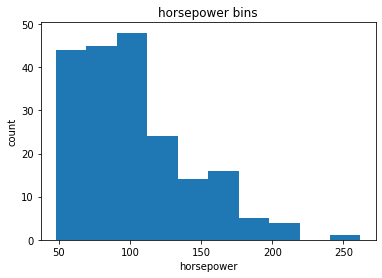

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dataframe["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [38]:
# We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.
bins = np.linspace(min(dataframe["horsepower"]), max(dataframe["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [39]:
# Set group names
group_names = ['Low', 'Medium', 'High']

In [40]:
# Applying the function 'cut'
dataframe['horsepower-binned'] = pd.cut(dataframe['horsepower'], bins, labels=group_names, include_lowest=True )
dataframe[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [41]:
# Show the number of vehicles in each bin
dataframe["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

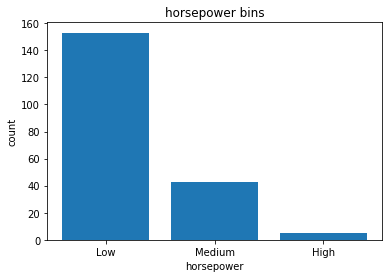

In [42]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, dataframe["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")